# Linear Regreesion - Univariate

 y = b0 + b1 * x
 
 where b0 and b1 are coefficients of regression
 
 we have to predict regression coefficients b0 and b1 by trainnig the model

## 1. predict 

In [1]:
def predict(x, b0, b1):
    return b0 + b1 * x

## 2. cost Function
computes the error percentage with the current value of regression coefficient.

In [2]:
def cost(x, y, b0, b1):
    errors = []
    
    for x,y in zip(x,y):
        prediction = predict(x,b0, b1)
        expected = y   # y is actual value
        difference = prediction - expected
        errors.append(differecnce)
        
        
    #now we use mean squared error to return mean of square
#     of all the errors.
    mse = sum([e * e for e in errors])/len(errors)
    return mse

## 3. Cost Derivative
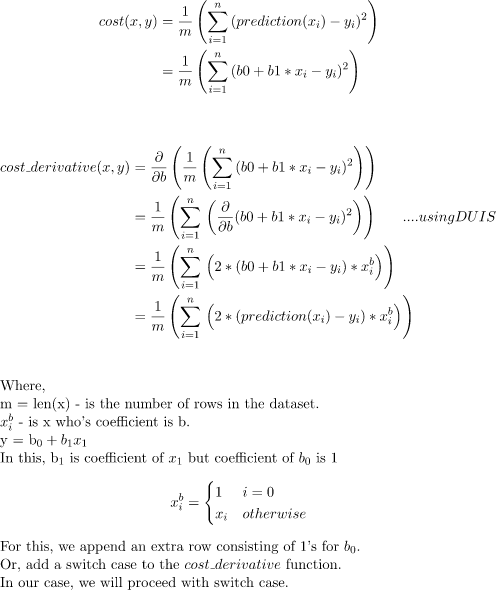

In [5]:
def costDerivative(x, y, b0, b1, i):
     return sum([ 
                  2*(predict(xi, b0, b1)-yi)*1
                   if i == 0
                   else 2*(predict(xi, b0, b1)-yi)*xi 
                   for xi, yi in zip(x, y) 
           ])/len(x) 
        

# GRADIENT DESCENT 
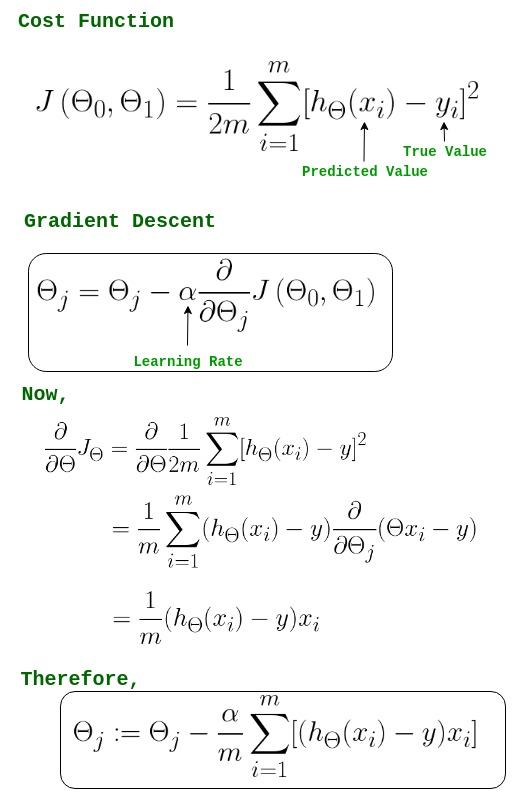

C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


100 epochs elapsed
Current accuracy is : 0.3677423409920224
Do you want to stop (y/*)??y


C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:90: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


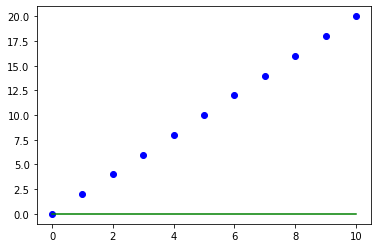

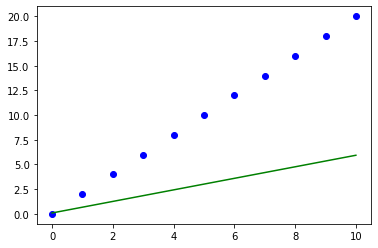

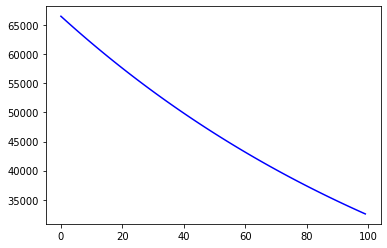

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
  
class Linear_Regression: 
    def __init__(self, X, Y): 
        self.X = X 
        self.Y = Y 
        self.b = [0, 0] 
      
    def update_coeffs(self, alpha): 
        Y_pred = self.predict() 
        Y = self.Y 
        m = len(Y) 
        self.b[0] = self.b[0] - (alpha * ((1/m) * 
                                  np.sum(Y_pred - Y))) 
  
        self.b[1] = self.b[1] - (alpha * ((1/m) * 
                                  np.sum((Y_pred - Y) * self.X))) 
  
    def predict(self, X=[]): 
        Y_pred = np.array([]) 
        if not X: X = self.X 
        b = self.b 
        for x in X: 
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x)) 
  
        return Y_pred 
      
    def get_current_accuracy(self, Y_pred): 
        p, e = Y_pred, self.Y 
        n = len(Y_pred) 
        return 1-sum( 
            [ 
                abs(p[i]-e[i])/e[i] 
                for i in range(n) 
                if e[i] != 0] 
        )/n 
#     def predict(self, b, yi): 
  
    def compute_cost(self, Y_pred): 
        m = len(self.Y) 
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2) 
        return J 
  
    def plot_best_fit(self, Y_pred, fig): 
                f = plt.figure(fig) 
                plt.scatter(self.X, self.Y, color='b') 
                plt.plot(self.X, Y_pred, color='g') 
                f.show() 
  
  
def main(): 
    X = np.array([i for i in range(11)]) 
    Y = np.array([2*i for i in range(11)]) 
  
    regressor = Linear_Regression(X, Y) 
  
    iterations = 0
    steps = 100
    learning_rate = 0.0001
    costs = [] 
      
    #original best-fit line 
    Y_pred = regressor.predict() 
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line') 
      
  
    while 1: 
        Y_pred = regressor.predict() 
        cost = regressor.compute_cost(Y_pred) 
        costs.append(cost) 
        regressor.update_coeffs(learning_rate) 
          
        iterations += 1
        if iterations % steps == 0: 
            print(iterations, "epochs elapsed") 
            print("Current accuracy is :",  
                   regressor.get_current_accuracy(Y_pred)) 
  
            stop = input("Do you want to stop (y/*)??") 
            if stop == "y": 
                break
  
    #final best-fit line 
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line') 
  
    #plot to verify cost fuction decreases 
    h = plt.figure('Verification') 
    plt.plot(range(iterations), costs, color='b') 
    h.show() 
  
    # if user wants to predict using the regressor: 
    regressor.predict([i for i in range(10)]) 
  
if __name__ == '__main__': 
    main() 